<a href="https://colab.research.google.com/github/akhilbonagiri8465/Prediction-Using-Unsupervised-ML/blob/main/Spark_Foundation_(Task_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AKHIL BONAGIRI

# GRIP - Spark Foundation

### Task-2 : Prediction using unsupervised ML (using iris dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading the dataset

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/akhilbonagiri8465/Prediction-Using-Unsupervised-ML/main/Iris.csv')

Data Visualization

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data.shape

(150, 6)

In [9]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
a= data.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
clust=[]

for i in range(1,11):
  kmeans= KMeans(n_clusters=i, init ='k-means++',
                 max_iter =300, n_init=10, random_state=0)
  
  kmeans.fit(a)
  clust.append(kmeans.inertia_)

Ploting line graph

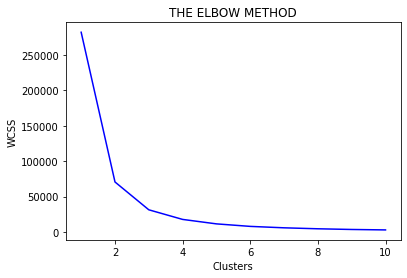

In [16]:
plt.plot(range(1,11),clust,color="blue")
plt.title("THE ELBOW METHOD")
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

APPLYING KMEANS TO THE DATASET WITH OPTIMUM NUMBER OF CLUSTERS

In [17]:
k_means = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_kmeans = k_means.fit_predict(a)

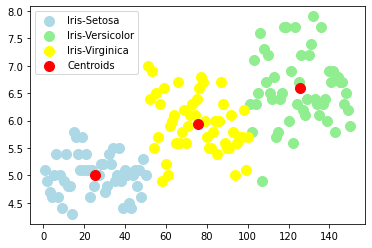

In [30]:
plt.scatter(a[pred_kmeans == 0, 0], a[pred_kmeans == 0, 1], s = 100, c = 'lightblue', label = 'Iris-Setosa')
plt.scatter(a[pred_kmeans == 1, 0], a[pred_kmeans == 1, 1], s = 100, c = 'lightgreen', label = 'Iris-Versicolor')
plt.scatter(a[pred_kmeans == 2, 0], a[pred_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Iris-Virginica')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s =100, c = 'red', label = 'Centroids')
plt.legend()